#  🟪 Can we predict Mental Ilness percentages in the future?

by Megin van Herk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import pyarrow
# import geopandas as gpd
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt

## 🟣 Domain understanding


Mental health disorders are complex and can take many forms. The underlying sources of the data presented in this entry apply specific definitions (which we describe in each relevant section), typically in accordance with WHO’s International Classification of Diseases (ICD-10). This broad definition incorporates many forms, including depression, anxiety, bipolar, eating disorders and schizophrenia.

## 🟣 Data sourcing


I found my data via Data.world. it linked back to the original soucre being, Ourworldindata:

https://ourworldindata.org/mental-health#all-charts-preview

## 🟣 Analytic approach

The dataset contain yearly data. I wish to predict future years using some sort of linear regression and/or Logistic Regression. I will also try K-Nearest Neighbors.

Our target variable will be the year.

## 🟣 Data requirements

The chosen analytic approach determines the data 
requirements. Specifically, the analytic methods to be used 
require certain data content, formats and representations, 
guided by domain knowledge.

For linear regression

- The variables should be measured at a continuous level.
- Use a scatterplot to find out quickly if there is a linear relationship between those two variables.
- The observations should be independent of each other (that is, there should be no dependency).

For logistic regression

Basic assumptions that must be met for logistic regression include independence of errors, linearity in the logit for continuous variables, absence of multicollinearity, and lack of strongly influential outliers.

## 🟣 Data collection

In this Dataset we present the latest estimates of mental health disorder prevalence and the associated disease burden. Most of the estimates presented in this entry are produced by the Institute for Health Metrics and Evaluation and reported in their flagship Global Burden of Disease study.

https://ourworldindata.org/mental-health#all-charts-preview

After searching for mental illness datasets, this one had the most elaborate Data. Concering a percentage for different mental illness per country. Also stating in which year these numbers belong to. Giving the oppurtunity to make predictions for coming years.
I also found another dataset stating specific depression cases. it stated people with depression if they had children where they worked and how much they earned. I chose this Dataset over the other because this one has more eleborate numbers concering each country, future predictions with this dataset will be more accurate. 

In [5]:
df = pd.read_excel ("C:/Users/Gebruiker/Documents/GitHub/AI/Data/Mental health Depression disorder Data.xlsx")#reading excel file
df

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013.0,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014.0,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015.0,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016.0,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


We will be prediciting the "year" column. To be able to see in to the future. I which to know what the percentages per country will be in the future.

## 🟣 Data understanding


To better understand the data its good to visualize the data. Its good to see what we can do with the data. The yearly data is good to visualize to see if there are patterns. There are allot of countries, we will be looking at mainly Netherlands and neighboring countries to limit the quantity of the data.

In [7]:
#First we filter the dataframe to just show us the netherlands
dfNL = df['Entity'] == 'Netherlands' #We make a new dataframe called dfNL, this will return true or false
NL = df[dfNL] #we then make this true or false statement into a dataframe
NL.shape #output dataframe size

(28, 10)

We can see our dataframe now has 23 rows instead of 6 thousand. 

In [9]:
NL.Year.unique() #show the unique values for the column Year

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017.])

Now we know the data goes from 1990 untill 2017, then we could possibly try to predict years >2017

I now want to see how all the mental illness columns difference throughout the years, by making a lineplot. First we will do depression

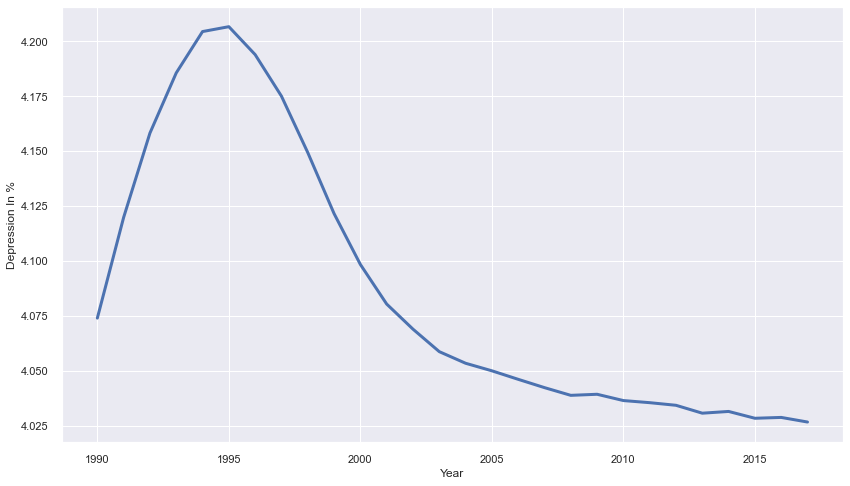

In [12]:
sns.set_style('darkgrid')# making the color of the plot a darker grid
sns.set(rc={'figure.figsize':(14,8)}) #the size of the plot
ax = sns.lineplot(data=NL, x ='Year', y = 'Depression (%)',
                  palette='viridis', #color pallete
                  legend='full', lw=3)
plt.ylabel('Depression In %')
plt.xlabel('Year')
plt.show()

This plot shows a clear peak in 1995 and a steady decline untill 2017. The percentage stays around the 4% of the population in NL

Now I want to see all the Mental illness compared to one another. 

In [20]:
#we need to filter the dataframe and only use the columns we need, which is "year" and all the mental illnesses
NL2 = NL[['Year','Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]
#then we will melt the column into 1
dfm = NL2.melt('Year', var_name='Mental', value_name='value%') #Reshape the DataFrame from wide to long with melt
dfm 

,Year,Mental,value%
0,1990.0,Schizophrenia (%),0.372879
1,1991.0,Schizophrenia (%),0.373018
2,1992.0,Schizophrenia (%),0.373143
3,1993.0,Schizophrenia (%),0.373262
4,1994.0,Schizophrenia (%),0.373355
...,...,...,...
191,2013.0,Alcohol use disorders (%),0.737441
192,2014.0,Alcohol use disorders (%),0.745301
193,2015.0,Alcohol use disorders (%),0.754582
194,2016.0,Alcohol use disorders (%),0.765080


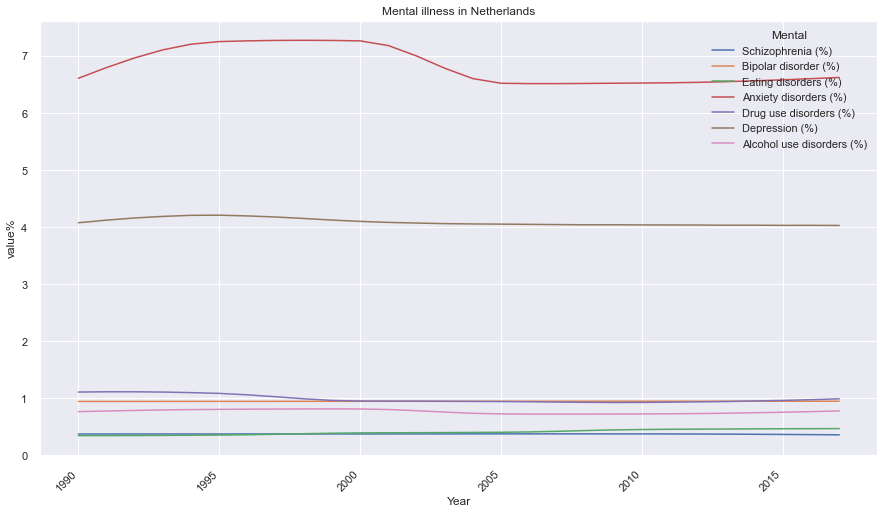

In [43]:
plt.gcf().set_size_inches(15, 8)#size of the plot
g = sns.lineplot(x="Year", y="value%", hue='Mental', data=dfm)#plot
plt.xticks(rotation = 45, ha = 'right')
plt.title('Mental illness in Netherlands')
plt.show()

This plot shows us that Anxiety disorder has the highest percentage out of all the mental illness. Depression has the second highest %. And the rest of the illness have the about the same percentage, around 1%. Lines like Eating disorder are very straight and doesnt move very much. You will probably get a high accuracy on predicting this.

Now I would like to see if other countries have very different data or not.

## 🟣 Data preparation

We can always check if there are correlations between columns. Although comparing different mental disorders is a bit questionable

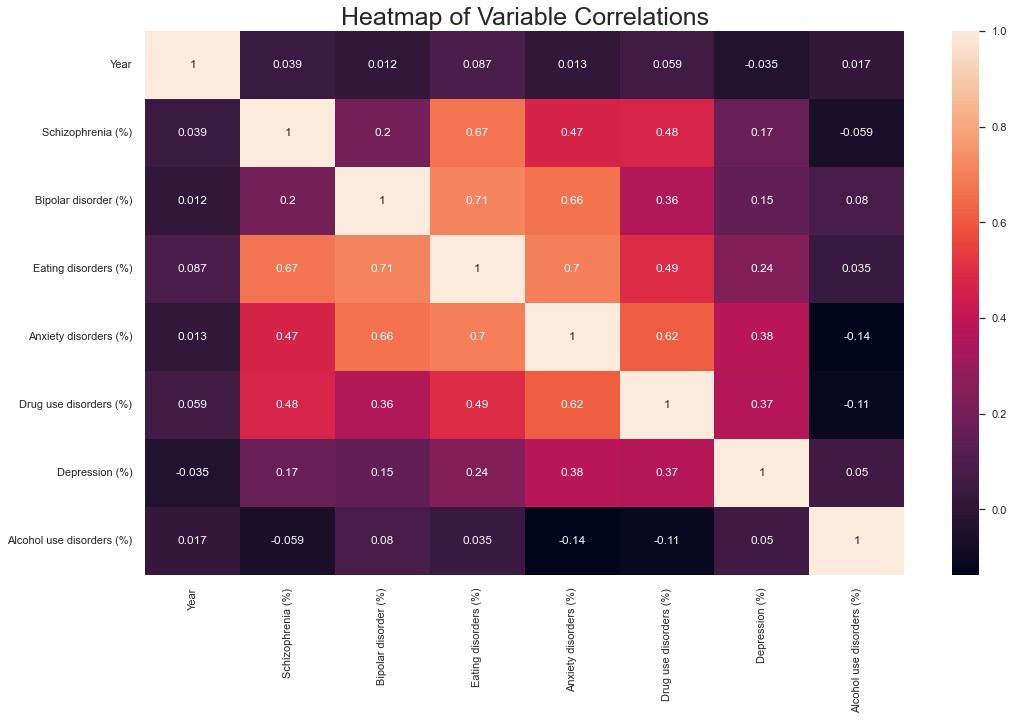

In [47]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()

## 🟣 Pre processing

## 🟣 Modelling

## 🟣 Evalutation